In [133]:
!pip install --quiet faiss-cpu langchain-community langchain-huggingface sentence-transformers langchain_mistralai

In [134]:
from langchain_community.vectorstores.faiss import FAISS
from langchain_mistralai import MistralAIEmbeddings
from langchain_huggingface.embeddings import HuggingFaceEmbeddings

import uuid
import os

from PIL import Image
from IPython.display import display

In [ ]:
embeddings = HuggingFaceEmbeddings(model_name="thenlper/gte-large")

image_folder = "ADD_PATH_TO_DATA"

image_files = [f.split('.')[0] for f in os.listdir(image_folder) if f.endswith(".png")]

tags = {
    "q1":"sick",
    "q2":"painted",
    "q3":"divisible",
    "q4":"sum",
    "q5":"election",
    }

In [136]:
texts = list(tags.values())

vector_db = FAISS.from_texts(texts=texts[0], embedding=embeddings) 

for img_name, tag in tags.items():
    image_path = os.path.join(image_folder, f"{img_name}.png")

    vector_db.add_texts(
        texts=[tag],  
        metadatas=[{"tag": tag, "image_path": image_path}],  
        ids=[str(uuid.uuid4())] 
    )

print("✅ All images and tags added to FAISS successfully!")

✅ All images and tags added to FAISS successfully!


In [137]:
import os

index_path = "faiss_index"

if os.path.exists(index_path):
    print(f"✅ Index found at '{index_path}', skipping save.")
else:
    vector_db.save_local(index_path)
    print(f"💾 FAISS index saved at '{index_path}'.")

vector_db.save_local(index_path)
print("💾 FAISS index updated successfully.")

vector_db = FAISS.load_local(index_path, embeddings=embeddings, allow_dangerous_deserialization=True)
print("🔄 FAISS index loaded successfully.")

print("✅ FAISS index saved and reloaded.")

✅ Index found at 'faiss_index', skipping save.
💾 FAISS index updated successfully.
🔄 FAISS index loaded successfully.
✅ FAISS index saved and reloaded.



🔍 Query: numeric

1. Tag: sum
🔷 Image Path: /kaggle/input/sample-data/q4.png
────────────────────────────────────────


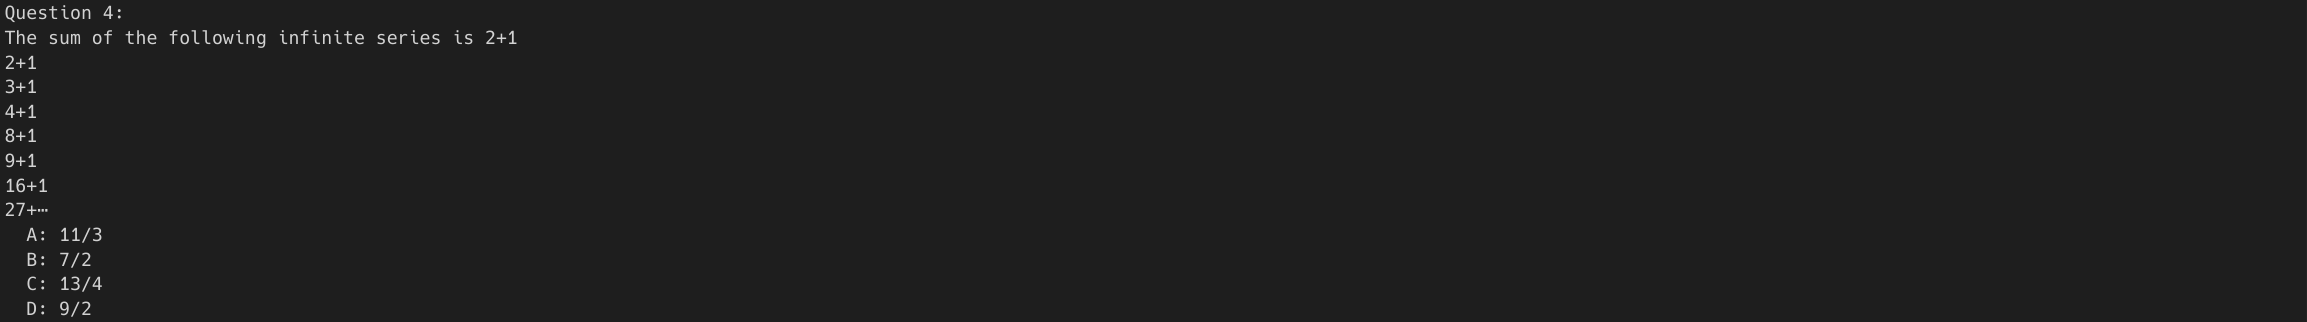



2. Tag: divisible
🔷 Image Path: /kaggle/input/sample-data/q3.png
────────────────────────────────────────


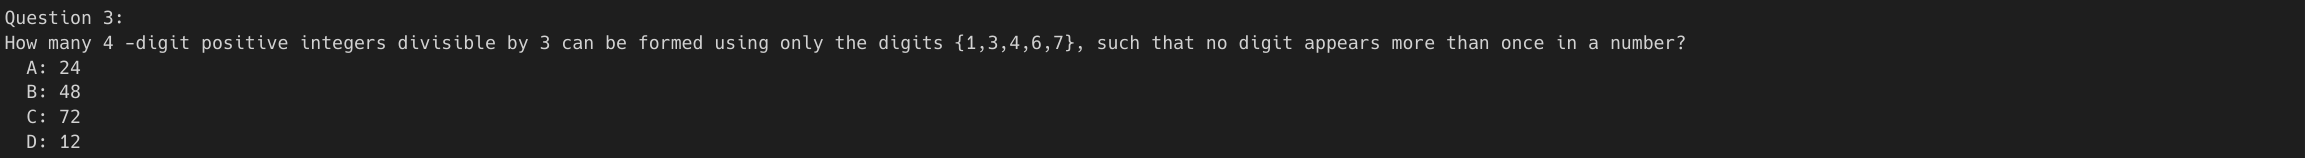

In [ ]:
def retrieve_similar_images(query_text, vector_db, top_k=2):
    query_vector = embeddings.embed_documents([query_text])[0]
    print(f"🔍 Query Vector: {query_vector}\n")
    results = vector_db.similarity_search_by_vector(query_vector, k=top_k)
    retrieved_metadata = [result.metadata for result in results]

    print(f"\n🔍 Query: {query_text}\n" )
    
    for idx, metadata in enumerate(retrieved_metadata, start=1):
        image_path, tag = metadata.get('image_path', 'N/A'), metadata.get('tag', 'N/A')
        print(f"{idx}. Tag: {tag}\n🔷 Image Path: {image_path}\n" + "─" * 40)
        
        try:
            display(Image.open(image_path))
            print("=" * 70)
            print("\n")
        except Exception as e:
            print(f"⚠️ Unable to load image: {e}")

    return retrieved_metadata

query = "numeric"
retrieved_data = retrieve_similar_images(query, vector_db)